In [9]:
#steps
#Step 1: Import Necessary Libraries
#Step 2: Load the Dataset
#Step 3: Understand and Preprocess the Data
#Step 4: Split the Data
#Step 5: Create a Pipeline
#Step 6: Train the Model
#Step 7: Evaluate the Model
#Step 8: Optimize Hyperparameters
#Step 9: Re-Evaluate with the Best Model
#Step 10: Save the Model
#Step 11: Make Predictions on New Data

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [18]:
# Load the dataset
heart_ds = pd.read_csv("heart.csv")

# Display the first few rows
print(heart_ds.head())

# Check dataset info
print(heart_ds.info())

# Check for missing values
print(heart_ds.isnull().sum());


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5 

In [22]:
# Check missing values
print(heart_ds.isnull().sum())
# suppose data age to thall is x-axis and target data is y-axis we can understand that x influence on the y(effected by the x)
# x independent , y = dependent
# Separate features and target
X = heart_ds.drop("target", axis=1)  # Features
y = heart_ds["target"]  # Target


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape
# 227 + 76 = 303 total rows
# for test 76 rows , which is 25% of total data keep in mind its not randomly data

((242, 13), (61, 13), (242,), (61,))

**Understand and Preprocess the Data**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('model', RandomForestClassifier(random_state=42))  # Classification model
])


In [27]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier(random_state=42))])

In [28]:
# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Confusion Matrix:
[[24  5]
 [ 5 27]]


In [29]:
param_grid = {
    'model__n_estimators': [50, 100, 150],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Display the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'model__max_depth': None, 'model__min_samples_split': 10, 'model__n_estimators': 50}
Best Cross-Validation Accuracy: 0.8139455782312925


**Re-Evaluate with the Best Model**

In [30]:
# Use the best model
best_model = grid_search.best_estimator_

# Test set predictions
y_pred_optimized = best_model.predict(X_test)

# Evaluate the optimized model
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"Optimized Accuracy: {accuracy_optimized:.2f}")


Optimized Accuracy: 0.87


**Save the Model**

In [31]:
import joblib

# Save the model
joblib.dump(best_model, "heart_disease_model.pkl")

# Load the model
loaded_model = joblib.load("heart_disease_model.pkl")


In [32]:
import joblib

# Load the saved pipeline
loaded_pipeline = joblib.load("heart_disease_model.pkl")

**Make Predictions on New Data**

In [33]:
# Example new data (replace with actual values)
new_patient = [[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]]

# Predict using the loaded model
prediction = loaded_model.predict(new_patient)
print("Prediction:", "Disease" if prediction[0] == 1 else "No Disease")


Prediction: Disease


C:\Users\ms\Desktop\ml_project\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**Visualizations for Heart Disease Model**

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ms\AppData\Local\Temp\ipykernel_17820\2721517549.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


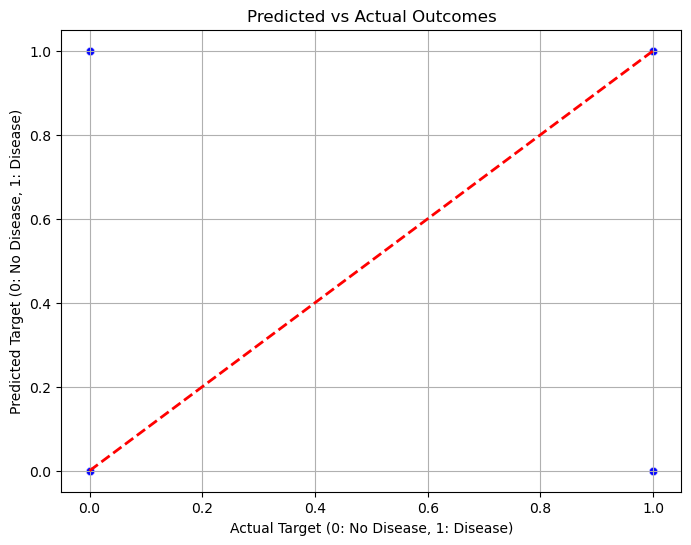

In [35]:
# Predict outcomes for the test set
y_test_pred = pipeline.predict(X_test)

# Convert predicted probabilities to binary predictions if the model is probabilistic
if hasattr(pipeline.named_steps['model'], 'predict_proba'):
    y_test_pred = (y_test_pred > 0.5).astype(int)

# Scatter plot for predicted vs actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.title('Predicted vs Actual Outcomes')
plt.xlabel('Actual Target (0: No Disease, 1: Disease)')
plt.ylabel('Predicted Target (0: No Disease, 1: Disease)')
plt.grid(True)
plt.show()

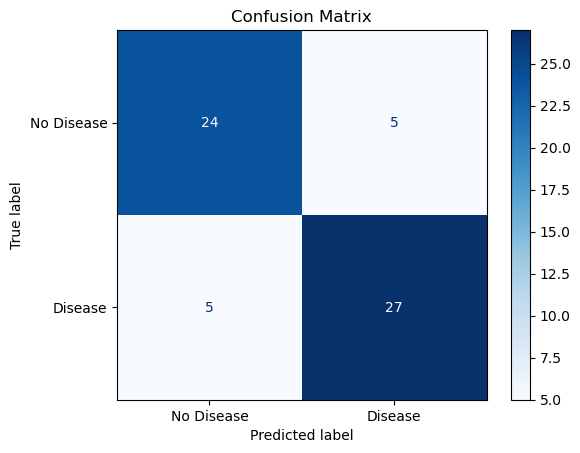

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Disease', 'Disease'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


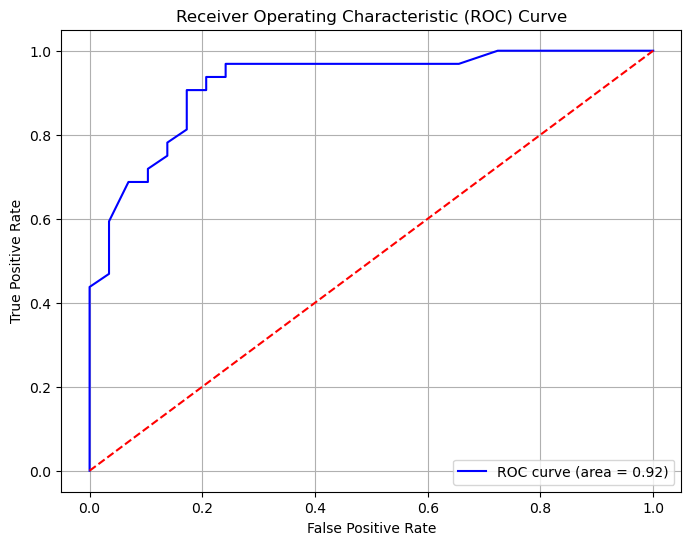

In [37]:
from sklearn.metrics import roc_curve, auc

# Generate probabilities for the positive class
if hasattr(pipeline.named_steps['model'], 'predict_proba'):
    y_test_proba = pipeline.predict_proba(X_test)[:, 1]
else:
    y_test_proba = pipeline.decision_function(X_test)

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

C:\Users\ms\AppData\Local\Temp\ipykernel_17820\3845420240.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


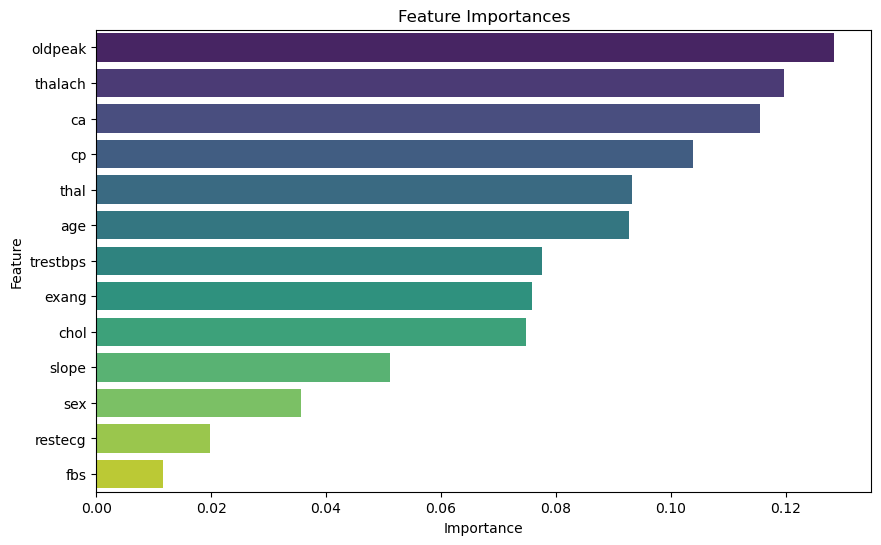

In [39]:
# Extract feature importance if using a tree-based model
if hasattr(pipeline.named_steps['model'], 'feature_importances_'):
    feature_importances = pipeline.named_steps['model'].feature_importances_
    feature_names = X_train.columns

    # Create a DataFrame for visualization
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    # Bar plot of feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
    plt.title('Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show();

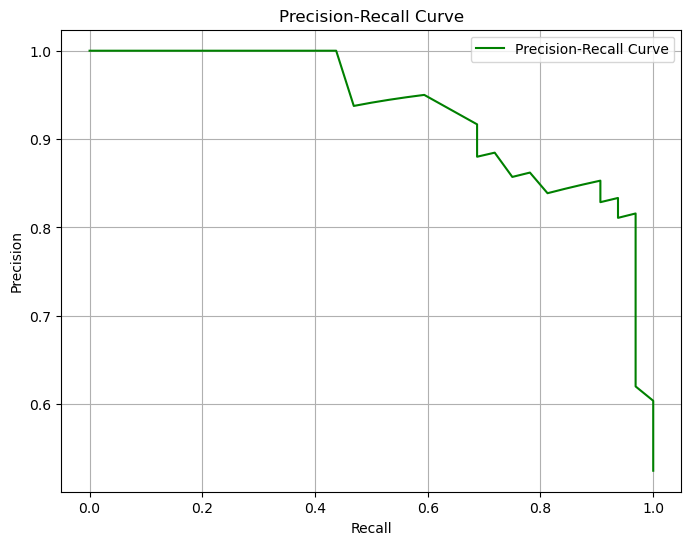

In [40]:
from sklearn.metrics import precision_recall_curve

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', label='Precision-Recall Curve')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.legend()
plt.show()